## Data Wrangling case study

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#loading dataset
titanic = sns.load_dataset('titanic')
tt1 = sns.load_dataset('titanic')
tt2 = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Steps in Data Wrangling
### 1- Dealing with missing values
    - missing values are N/A or NaN or ? or 0 or a blank space

In [4]:
# whare exactly the missing values are
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Total rows and columns in dataset
titanic.shape

(891, 15)

#### Droping unwanted or useless columns

In [6]:
titanic.dropna(subset=['deck'], axis=0, inplace=True)

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [8]:
# Checking for null values
titanic.isnull().sum()

survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [9]:
# Removing null values from whole dataset
titanic = titanic.dropna()
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

`Here we can see all the null values are removed`

In [10]:
titanic.shape

(182, 15)

### Other methods on second variable

In [11]:
tt1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Replacing the missing values with mean

In [12]:
# finding an average (mean)
age_mean = tt1['age'].mean()
age_mean

29.69911764705882

In [13]:
# replacing nan with mean of the data (updating as well)
tt1['age'] = tt1['age'].replace(np.nan, age_mean)

In [14]:
tt1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# removing deck column
tt1.dropna(subset=['deck'], axis=0, inplace=True)

In [16]:
tt1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [17]:
# Droping all unwanted cloumns by names
tt1.dropna(subset=['embark_town' , 'embarked'], axis=0, inplace=True)

In [18]:
tt1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Data formating

In [19]:
tt1.shape

(201, 15)

In [20]:
# cecking the datatype for converting it into one type
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### Changing the datatype of a column

In [21]:
# changing datatype from one formate to the other
titanic['survived'] = titanic['survived'].astype("float64")

### More Diffirent operation

In [22]:
# converting age into the days
tt1['age'] = tt1['age']*365
tt1.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,13870.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,12775.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,19710.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,1460.000000,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,21170.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,12410.000000,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,10220.000000,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,6935.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,10840.177941,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,17885.000000,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


In [23]:
tt1['age'] = tt1['age'].astype("int64")
tt1.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,19710,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,1460,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,21170,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,12410,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,10220,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,6935,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,10840,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,17885,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


### Renaming a column

In [24]:
# renaming the name of changed column 
tt1.rename(columns={"age": "age in days"}, inplace=True)
tt1.head(10)

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,19710,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,1460,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,21170,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,12410,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,10220,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,6935,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,10840,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,17885,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


### Data Normalization
- uniform data
- Data have same impact
- For computitional resons (large datasets)

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [26]:
tt4 = titanic[['age', 'fare']]
tt4.head()

,age,fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500


### Methods of Normalization
1. simple feature scaling
    - x(new) = x(old) / x(max)
2. min-max method 
3. Z-scoe (standard score) -3 to +3 
4. log transformation  

`` 1-Simple Feature Scalling ``

In [27]:
# simple feature scalling
tt4['fare'] = tt4['fare'] / tt4['fare'].max()
tt4['age'] = tt4['age'] / tt4['age'].max()
tt4.head()

C:\Users\C Collection\AppData\Local\Temp\ipykernel_1864\747646836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt4['fare'] = tt4['fare'] / tt4['fare'].max()
C:\Users\C Collection\AppData\Local\Temp\ipykernel_1864\747646836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt4['age'] = tt4['age'] / tt4['age'].max()


,age,fare
1,0.4750,0.139136
3,0.4375,0.103644
6,0.6750,0.101229
10,0.0500,0.032596
11,0.7250,0.051822


`` 2-Min Max method``

In [28]:
# Min Max method
tt2['fare'] = (tt2['fare']-tt2['fare'].min()) / (tt2['fare'].max()-tt2['fare'].min())
tt2['fare'].head()


0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
Name: fare, dtype: float64

`` 3-Min Max method ``

In [29]:
# Z-score method
tt2['age'] = (tt2['age']-tt2['age'].mean()) / tt2['age'].std()
tt2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530005,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571430,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254646,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.364911,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.364911,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True


`` 4-Log Transformation ``

In [30]:
# log transformation
tt1['age in days'] = np.log(tt1['age in days'])
tt1['age in days'].head()

1     9.537484
3     9.455245
6     9.888881
10    7.286192
11    9.960340
Name: age in days, dtype: float64

In [31]:
tt1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,9.537484,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,9.455245,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,9.888881,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,7.286192,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,9.960340,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### Bining
- grouping of values into smaller number of values
- convert numeric into categories
- to have better understanding of groups 
    - low vs mid vs high price 

## 1- Binning by distance

In [32]:
tt5 = titanic[['age']].dropna()
tt5.head()

,age
1,38.0
3,35.0
6,54.0
10,4.0
11,58.0


In [33]:
tt5['age'] = tt5['age'].astype("int64")

In [34]:
# calculating minimun and maximum values of column
min_value = tt5['age'].min()
max_value = tt5['age'].max()
print(min_value)
print(max_value)

0
80


In [35]:
# calculate the 3 bins, equally distributed.
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins

array([ 0.        , 26.66666667, 53.33333333, 80.        ])

In [36]:
# make the lables
labels = ['child', 'young', 'old']

In [37]:
# convert the numeric values of the column into the categorical values
tt5['bins'] = pd.cut(tt5['age'], bins=bins, labels=labels, include_lowest=True)
tt5['bins']

1      young
3      young
6        old
10     child
11       old
       ...  
871    young
872    young
879      old
887    child
889    child
Name: bins, Length: 182, dtype: category
Categories (3, object): ['child' < 'young' < 'old']

(array([104.,  25.,  53.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

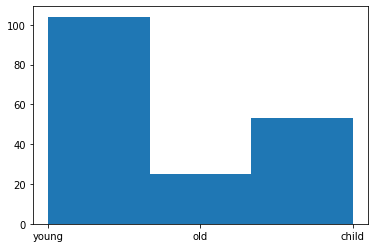

In [38]:
import matplotlib.pyplot as plt
plt.hist(tt5['bins'], bins=3)

# Converting catagories into dummies
- easy to use for computition
- male feamle (0, 1)

In [39]:
# creating dummy values
dummies = pd.get_dummies(titanic['sex'])
dummies

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


### Appending created dummies into dataset

In [40]:
# apending dummy values in dataset/ datframe
titanic = pd.concat([titanic, dummies],axis=1) 
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female,male
1,1.0,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
3,1.0,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
6,0.0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0,1
10,1.0,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1,0
11,1.0,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1,0
